In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Company_x.xlsx')

In [3]:
df.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,932,Creditor 1,3677,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,53.0,0,0,1,N,NaN,NaN,NaN
1,160,Creditor 2,4276,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,...,NaN,1.0,NaN,0,0,1,Y,NaN,NaN,NaN
2,932,Creditor 1,8525,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,NaN,1,0,1,N,NaN,NaN,NaN
3,160,Creditor 2,9859,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,NaN,...,NaN,1.0,NaN,1,0,1,Y,NaN,NaN,NaN
4,932,Creditor 1,12807,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,46.0,2,0,1,Y,NaN,NaN,NaN


In [4]:
df.shape

(406423, 25)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EntityID,406423.0,3.970443e+07,4.698070e+07,160.00,3.010600e+06,3010949.00,9.990131e+07,9.990159e+07
AccountID,406423.0,3.954380e+08,4.654769e+08,3677.00,3.023088e+07,30450753.00,9.901891e+08,9.904958e+08
CurrentBalance,406423.0,1.301866e+03,4.030514e+03,-7717.20,8.533000e+01,457.51,1.159365e+03,4.416815e+05
DebtLoadPrincipal,406423.0,1.539011e+03,4.416229e+03,0.00,2.469700e+02,619.00,1.393780e+03,8.443430e+05
Balanaceatdebt_load,406423.0,1.600934e+03,4.531889e+03,0.00,2.498750e+02,630.74,1.433755e+03,8.443430e+05
PurchasePrice,403731.0,5.618606e+00,5.441934e+00,0.19,3.070000e+00,4.22,6.590000e+00,5.218000e+01
LastPaymentAmount,103977.0,2.838969e+02,1.119842e+03,0.01,2.000000e+01,40.00,1.429000e+02,7.313184e+04
NumLiableParties,406301.0,1.017145e+00,1.328660e-01,1.00,1.000000e+00,1.00,1.000000e+00,4.000000e+00
CustomerAge,376941.0,4.572806e+01,1.295039e+01,-41.00,3.600000e+01,44.00,5.400000e+01,1.330000e+02
NumPhones,406423.0,4.356520e-01,7.148517e-01,0.00,0.000000e+00,0.00,1.000000e+00,8.000000e+00


## Data Cleaning

In [6]:
# Seeing how many duplicated values are there
df.duplicated().sum()

0

In [7]:
# Checking how many null values are present in the data 
df.isnull().sum()

EntityID                           0
OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                   2692
ProductOrDebtType                  0
CollectionStatus                   0
ClosureReason                 397393
InBankruptcy                       0
AccountInsolvencyType         406138
CustomerInsolvencyType        397892
IsLegal                            0
LastPaymentAmount             302446
LastPaymentMethod             302446
NumLiableParties                 122
CustomerAge                    29482
NumPhones                          0
NumEmails                          0
NumAddresses                       0
IsStatBarred                       0
Unnamed: 22                   406423
Unnamed: 23                   406423
Unnamed: 24                   406422
dtype: int64

In [8]:
#How much Percent of the NULL values does esch column contains
df.isnull().sum()/len(df)*100

EntityID                        0.000000
OriginalCreditor[Redacted]      0.000000
AccountID                       0.000000
CurrentBalance                  0.000000
DebtLoadPrincipal               0.000000
Balanaceatdebt_load             0.000000
PurchasePrice                   0.662364
ProductOrDebtType               0.000000
CollectionStatus                0.000000
ClosureReason                  97.778177
InBankruptcy                    0.000000
AccountInsolvencyType          99.929876
CustomerInsolvencyType         97.900955
IsLegal                         0.000000
LastPaymentAmount              74.416556
LastPaymentMethod              74.416556
NumLiableParties                0.030018
CustomerAge                     7.254019
NumPhones                       0.000000
NumEmails                       0.000000
NumAddresses                    0.000000
IsStatBarred                    0.000000
Unnamed: 22                   100.000000
Unnamed: 23                   100.000000
Unnamed: 24     

In [9]:
# There are several columns with more than 70% of the data missing.
# We'll be dropping such columns
df.drop(columns=['ClosureReason', 'AccountInsolvencyType', 'CustomerInsolvencyType', 'LastPaymentAmount', 'LastPaymentMethod', 
                 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'], inplace = True)

In [10]:
df.isnull().sum()/len(df)*100

EntityID                      0.000000
OriginalCreditor[Redacted]    0.000000
AccountID                     0.000000
CurrentBalance                0.000000
DebtLoadPrincipal             0.000000
Balanaceatdebt_load           0.000000
PurchasePrice                 0.662364
ProductOrDebtType             0.000000
CollectionStatus              0.000000
InBankruptcy                  0.000000
IsLegal                       0.000000
NumLiableParties              0.030018
CustomerAge                   7.254019
NumPhones                     0.000000
NumEmails                     0.000000
NumAddresses                  0.000000
IsStatBarred                  0.000000
dtype: float64

In [11]:
# For the other missing value columns, We'll impute them using mean, median or mode after seeing their respective PDF plots.

In [12]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['EntityID', 'AccountID', 'CurrentBalance', 'DebtLoadPrincipal',
       'Balanaceatdebt_load', 'PurchasePrice', 'NumLiableParties',
       'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses'],
      dtype='object')

In [13]:
category_cols = df.select_dtypes(include=['object']).columns
category_cols

Index(['OriginalCreditor[Redacted]', 'ProductOrDebtType', 'CollectionStatus',
       'InBankruptcy', 'IsLegal', 'IsStatBarred'],
      dtype='object')

PurchasePrice --------> 6.187656943417617
CustomerAge --------> 0.7506939794502261
NumLiableParties --------> 7.971820376164787


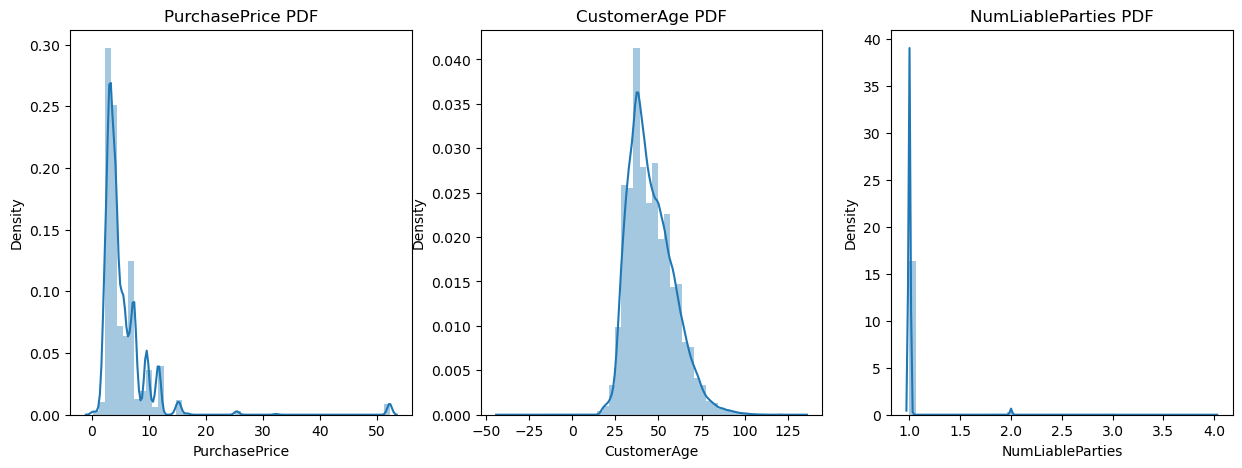

In [14]:
# PurchasePrice PDF plot and skewness
plt.figure(figsize=(15,5), dpi=100)
print('PurchasePrice', '-------->', df['PurchasePrice'].skew())
plt.subplot(131)
sns.distplot(df['PurchasePrice'])
plt.title('PurchasePrice PDF')

print('CustomerAge', '-------->', df['CustomerAge'].skew())
plt.subplot(132)
sns.distplot(df['CustomerAge'])
plt.title('CustomerAge PDF')

print('NumLiableParties', '-------->', df['NumLiableParties'].skew())
plt.subplot(133)
sns.distplot(df['NumLiableParties'])
plt.title('NumLiableParties PDF')

plt.show()

In [15]:
# Filling the missing values for these columns
df['PurchasePrice'] = df['PurchasePrice'].fillna(df['PurchasePrice'].median())
df['CustomerAge'] = df['CustomerAge'].fillna(df['CustomerAge'].mean())
df['NumLiableParties'] = df['NumLiableParties'].fillna(df['NumLiableParties'].median())

In [16]:
# Checking for null values again
df.isnull().sum()/len(df)*100

EntityID                      0.0
OriginalCreditor[Redacted]    0.0
AccountID                     0.0
CurrentBalance                0.0
DebtLoadPrincipal             0.0
Balanaceatdebt_load           0.0
PurchasePrice                 0.0
ProductOrDebtType             0.0
CollectionStatus              0.0
InBankruptcy                  0.0
IsLegal                       0.0
NumLiableParties              0.0
CustomerAge                   0.0
NumPhones                     0.0
NumEmails                     0.0
NumAddresses                  0.0
IsStatBarred                  0.0
dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   Balanaceatdebt_load         406423 non-null  float64
 6   PurchasePrice               406423 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   InBankruptcy                406423 non-null  object 
 10  IsLegal                     406423 non-null  object 
 11  NumLiableParties            406423 non-null  float64
 12  CustomerAge                 406423 non-null  float64
 13  NumPhones     

## EDA

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EntityID,406423.0,3.970443e+07,4.698070e+07,160.00,3.010600e+06,3010949.00,9.990131e+07,9.990159e+07
AccountID,406423.0,3.954380e+08,4.654769e+08,3677.00,3.023088e+07,30450753.00,9.901891e+08,9.904958e+08
CurrentBalance,406423.0,1.301866e+03,4.030514e+03,-7717.20,8.533000e+01,457.51,1.159365e+03,4.416815e+05
DebtLoadPrincipal,406423.0,1.539011e+03,4.416229e+03,0.00,2.469700e+02,619.00,1.393780e+03,8.443430e+05
Balanaceatdebt_load,406423.0,1.600934e+03,4.531889e+03,0.00,2.498750e+02,630.74,1.433755e+03,8.443430e+05
PurchasePrice,406423.0,5.609342e+00,5.425067e+00,0.19,3.070000e+00,4.22,6.590000e+00,5.218000e+01
NumLiableParties,406423.0,1.017140e+00,1.328464e-01,1.00,1.000000e+00,1.00,1.000000e+00,4.000000e+00
CustomerAge,406423.0,4.572806e+01,1.247184e+01,-41.00,3.700000e+01,45.00,5.300000e+01,1.330000e+02
NumPhones,406423.0,4.356520e-01,7.148517e-01,0.00,0.000000e+00,0.00,1.000000e+00,8.000000e+00
NumEmails,406423.0,2.081132e-01,4.343212e-01,0.00,0.000000e+00,0.00,0.000000e+00,5.000000e+00


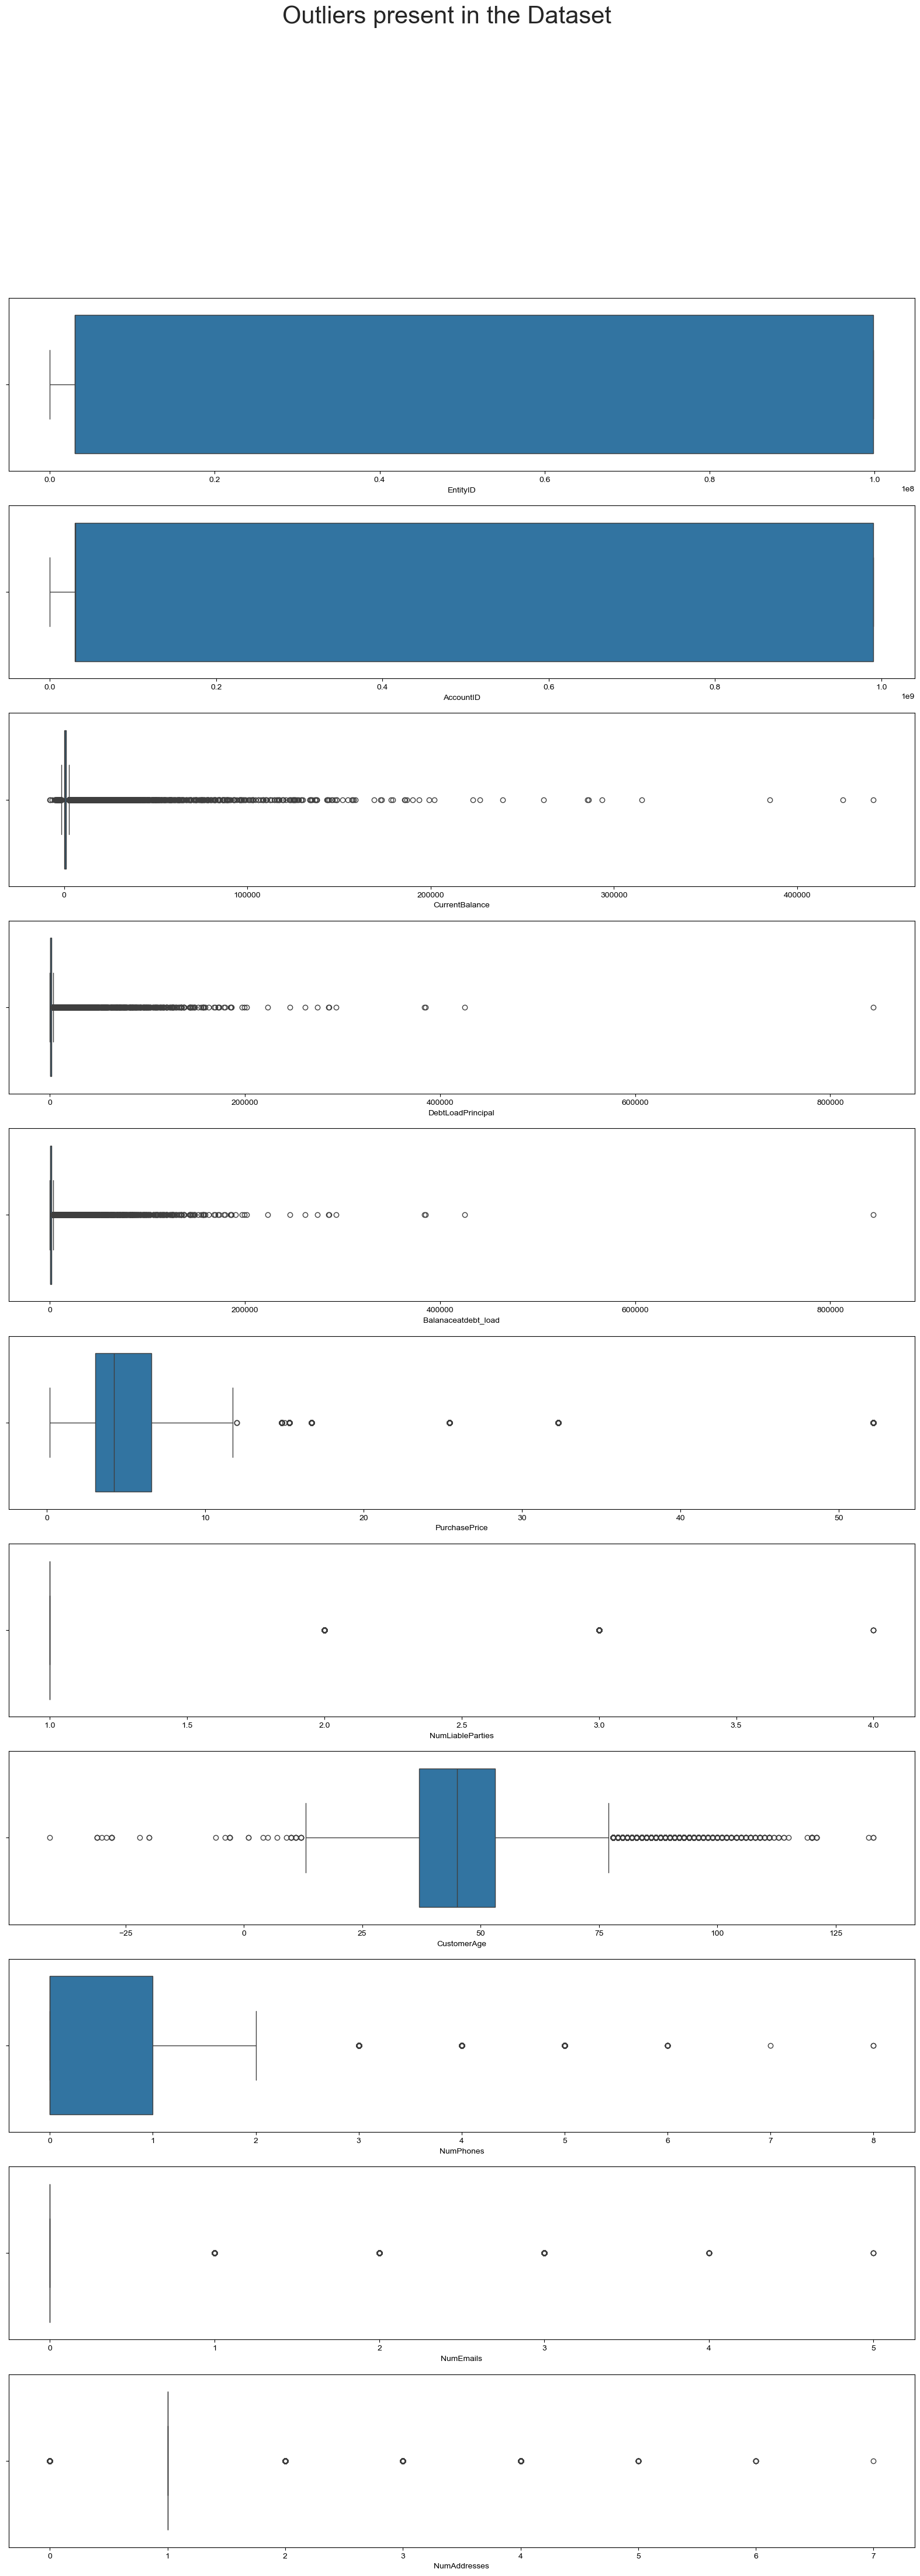

In [19]:
# Checking for Outliers
f,a = plt.subplots(11,1, figsize=(20,50))
sns.set(font_scale=1.5)
sns.boxplot(x=df['EntityID'], ax=a[0])
sns.boxplot(x=df['AccountID'], ax=a[1])
sns.boxplot(x=df['CurrentBalance'], ax=a[2])
sns.boxplot(x=df['DebtLoadPrincipal'], ax=a[3])
sns.boxplot(x=df['Balanaceatdebt_load'], ax=a[4])
sns.boxplot(x=df['PurchasePrice'], ax=a[5])
sns.boxplot(x=df['NumLiableParties'], ax=a[6])
sns.boxplot(x=df['CustomerAge'], ax=a[7])
sns.boxplot(x=df['NumPhones'], ax=a[8])
sns.boxplot(x=df['NumEmails'], ax=a[9])
sns.boxplot(x=df['NumAddresses'], ax=a[10])
plt.suptitle('Outliers present in the Dataset', fontsize=30)
plt.show()

In [20]:
# Method for Removing Outliers
def outlier_cap(col):
    Q3=np.percentile(df[col], 75)
    Q1=np.percentile(df[col], 25)
    
    iqr=Q3-Q1
    
    lower_limit = Q1-1.5*iqr
    upper_limit = Q3+1.5*iqr
    
    trimmed_mean = sc.stats.trim_mean(df[col], 0.3)
    df[col] = df[col].apply(lambda x: trimmed_mean if x<lower_limit or x>upper_limit else x)
    return df

for i in range(2, len(numerical_cols)):
    outlier_cap(numerical_cols[i])

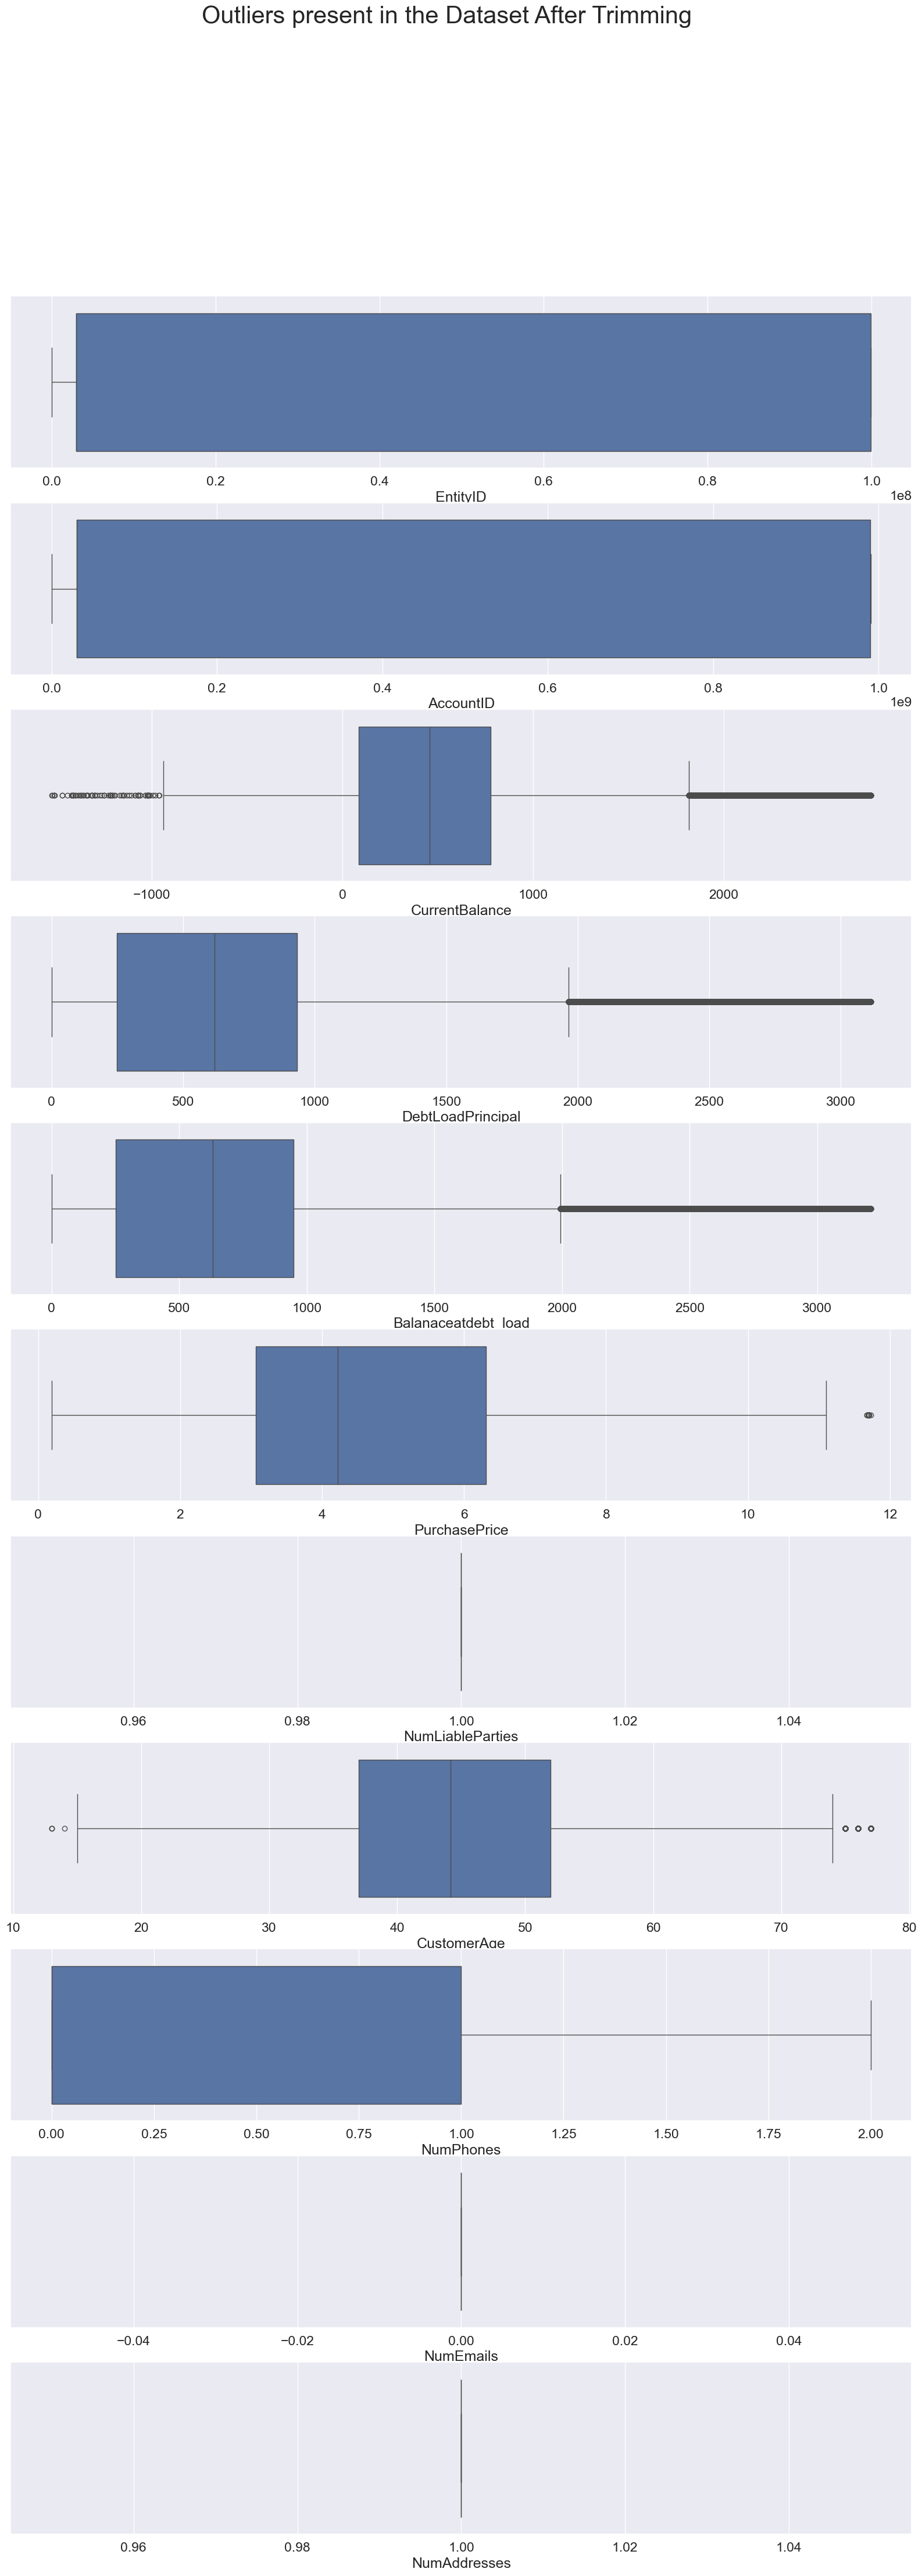

In [21]:
# Checking for Outliers After Trimming
f,a = plt.subplots(11,1, figsize=(20,50))
sns.set(font_scale=1.5)
sns.boxplot(x=df['EntityID'], ax=a[0])
sns.boxplot(x=df['AccountID'], ax=a[1])
sns.boxplot(x=df['CurrentBalance'], ax=a[2])
sns.boxplot(x=df['DebtLoadPrincipal'], ax=a[3])
sns.boxplot(x=df['Balanaceatdebt_load'], ax=a[4])
sns.boxplot(x=df['PurchasePrice'], ax=a[5])
sns.boxplot(x=df['NumLiableParties'], ax=a[6])
sns.boxplot(x=df['CustomerAge'], ax=a[7])
sns.boxplot(x=df['NumPhones'], ax=a[8])
sns.boxplot(x=df['NumEmails'], ax=a[9])
sns.boxplot(x=df['NumAddresses'], ax=a[10])
plt.suptitle('Outliers present in the Dataset After Trimming', fontsize=30)
plt.show()

<Axes: xlabel='IsStatBarred', ylabel='count'>

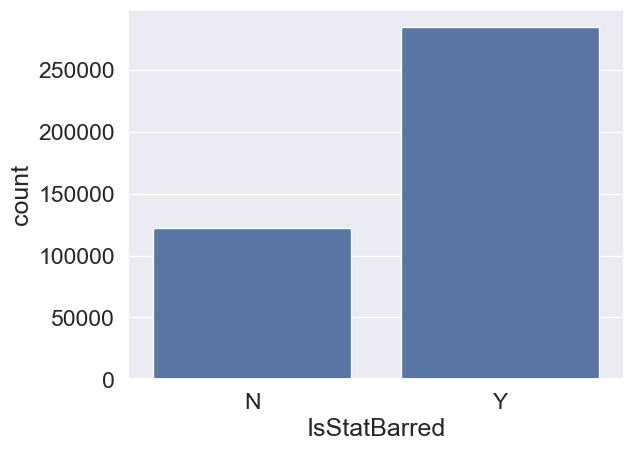

In [22]:
# Number of values of both classes
sns.countplot(x = df['IsStatBarred'])

In [23]:
df.sample(10)

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
368483,99901420,Creditor 42,990285475,-1.98,649.670386,663.369694,4.301359,Finance Company - Other,PAID_IN_FULL,N,N,1.0,37.000000,1.0,0.0,1.0,N
297352,99901306,Creditor 47,990181621,403.84,367.130000,367.130000,2.320000,Utilities/Telco - Other,ACTIVE,N,N,1.0,48.000000,1.0,0.0,1.0,Y
64021,3010600,Creditor 17,30193291,557.58,557.580000,557.580000,3.070000,Utilities/Telco - Other,ACTIVE,N,N,1.0,61.000000,0.0,0.0,1.0,Y
366311,99901379,Creditor 19,990272004,723.53,690.030000,690.030000,7.380000,Finance Company - Other,ACTIVE,N,N,1.0,26.000000,0.0,0.0,1.0,N
211581,3011037,Creditor 41,30463387,1227.75,1115.230000,1115.230000,1.840000,Other,ACTIVE,N,N,1.0,44.000000,0.0,0.0,1.0,Y
122,1504,Creditor 3,80049,0.00,2181.280000,2181.280000,4.220000,Other,PAID_IN_FULL,N,Y,1.0,45.000000,1.0,0.0,1.0,N
70251,3010600,Creditor 17,30199521,606.74,606.740000,606.740000,3.070000,Utilities/Telco - Other,PASSIVE,N,N,1.0,44.156785,0.0,0.0,1.0,Y
65062,3010600,Creditor 17,30194332,50.00,50.000000,50.000000,3.070000,Utilities/Telco - Other,PASSIVE,N,N,1.0,31.000000,0.0,0.0,1.0,Y
397864,99901565,Creditor 50,990452936,0.00,3101.630000,3101.630000,7.380000,Finance Company - Other,PAID_IN_FULL,N,N,1.0,32.000000,1.0,0.0,1.0,N
30527,3010718,Creditor 10,30091381,0.00,799.270000,974.720000,4.960000,Other,PAID_IN_FULL,N,N,1.0,43.000000,1.0,0.0,1.0,N


<Axes: xlabel='IsStatBarred', ylabel='CurrentBalance'>

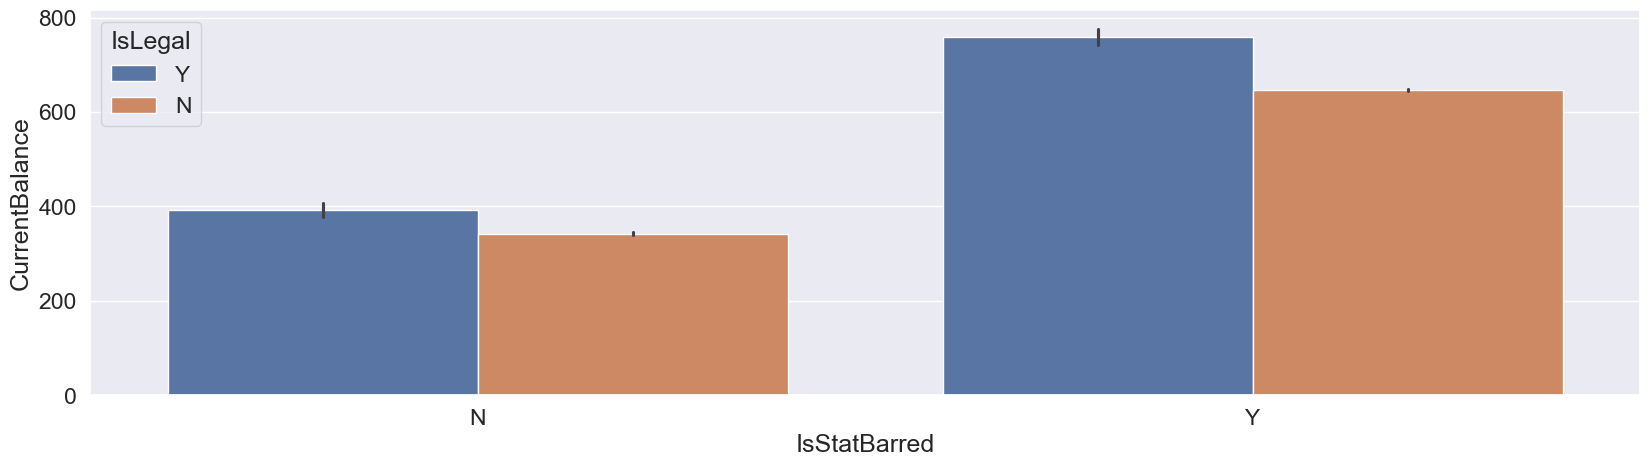

In [24]:
plt.figure(figsize=(20,5))
sns.barplot(data=df, x=df['IsStatBarred'], y=df['CurrentBalance'], hue=df['IsLegal'])

<Axes: xlabel='IsStatBarred', ylabel='DebtLoadPrincipal'>

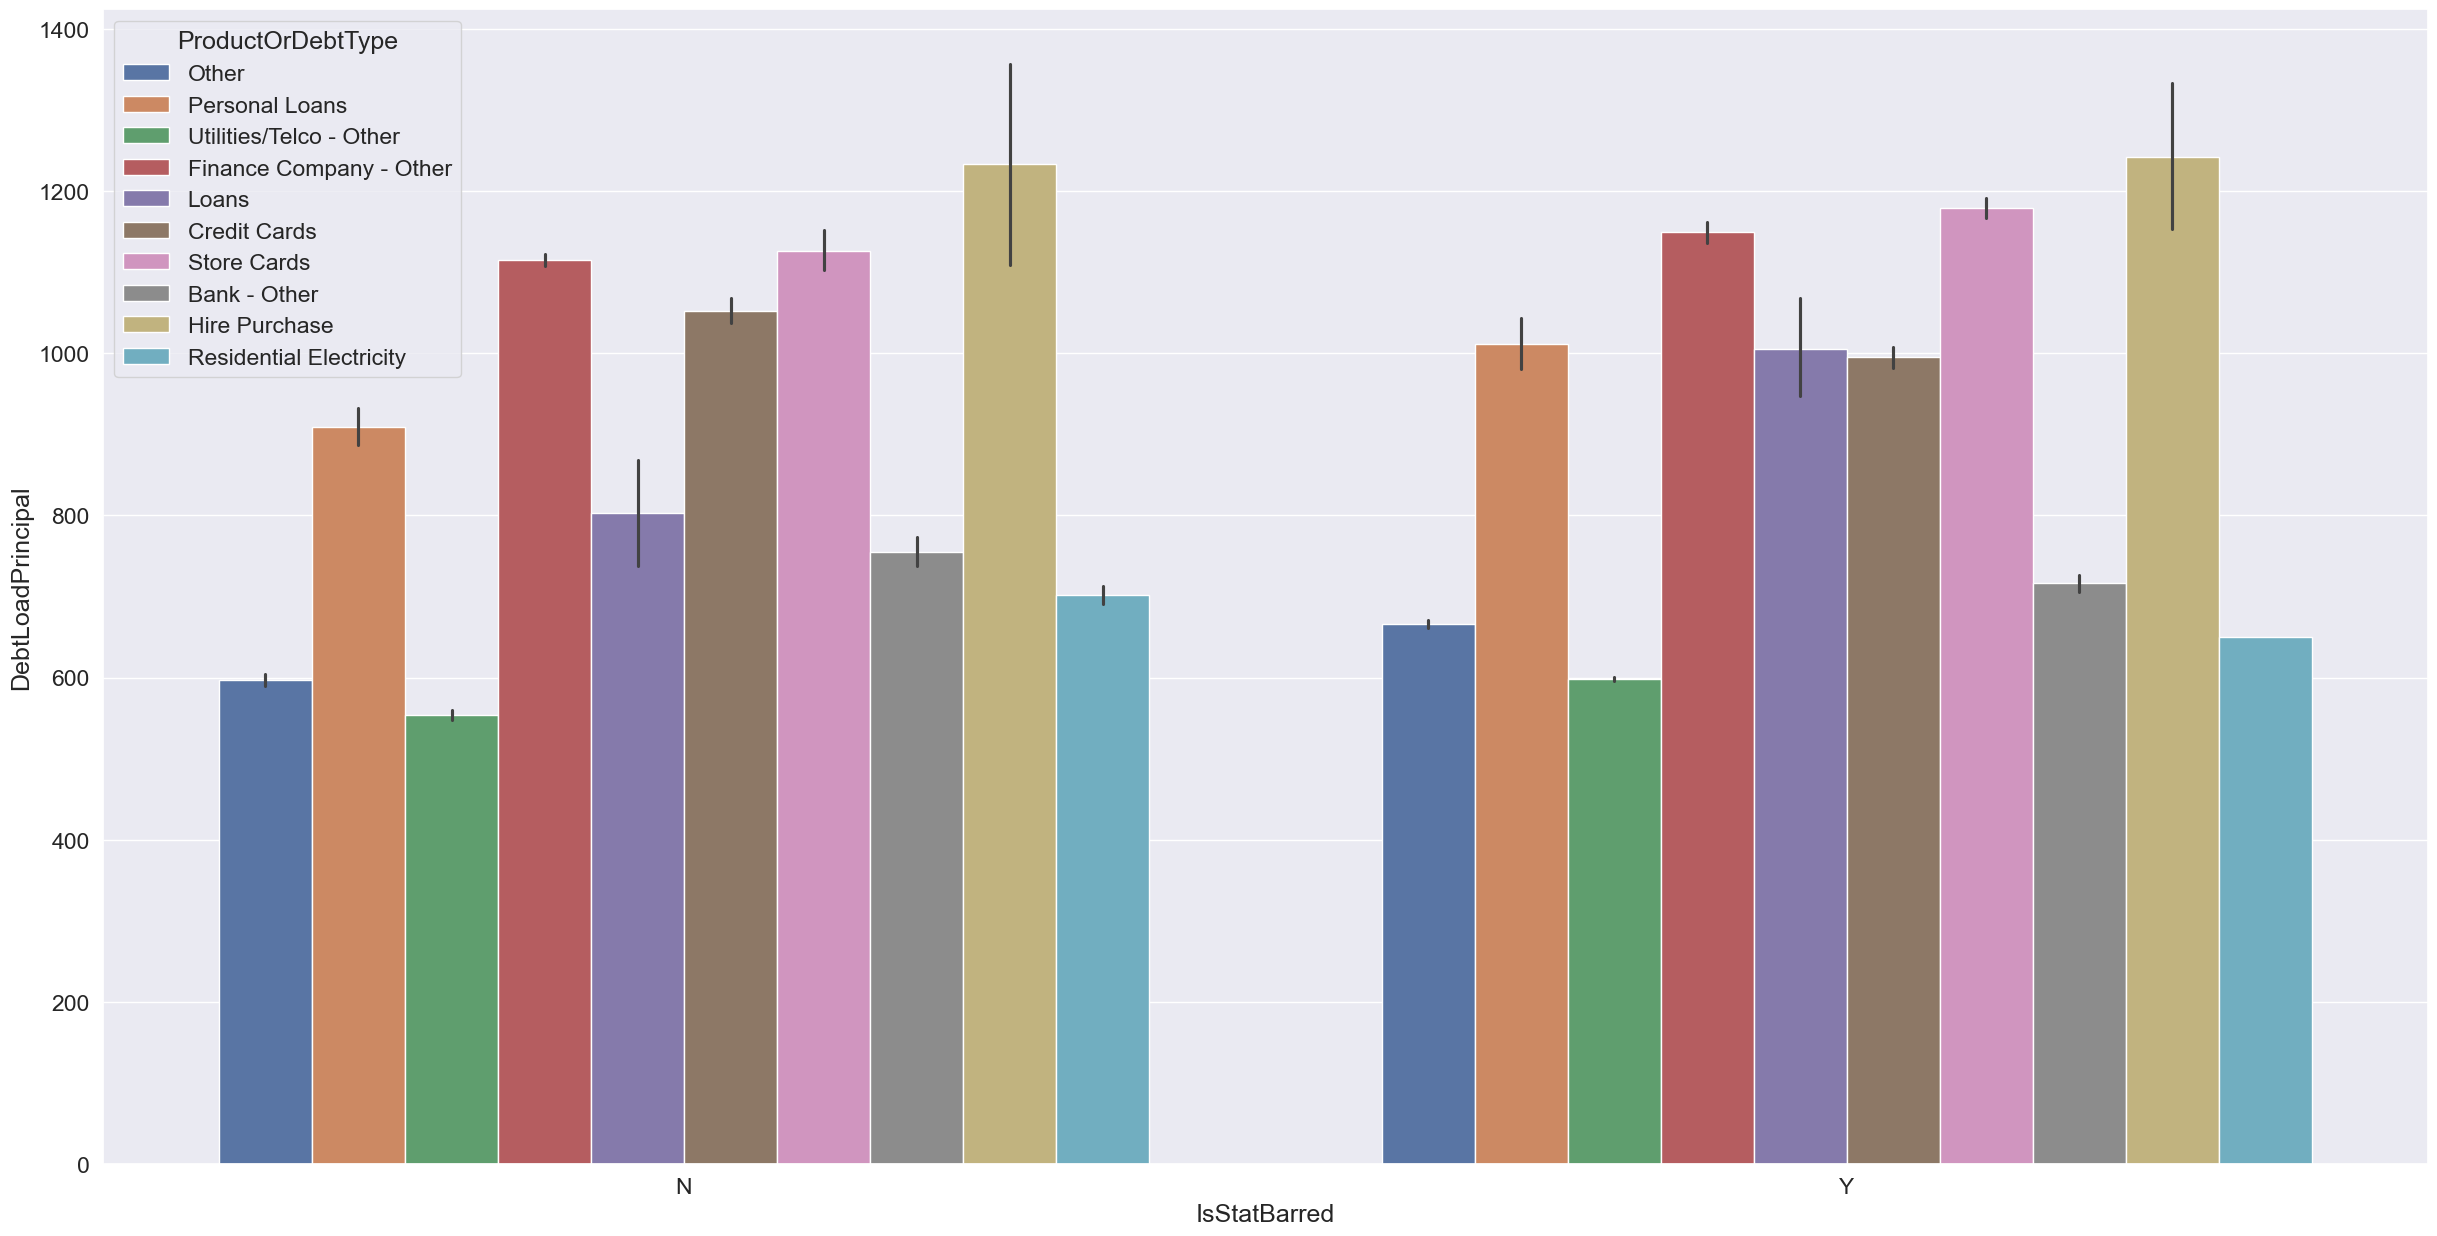

In [25]:
plt.figure(figsize=(30,15))
sns.barplot(data=df, x=df['IsStatBarred'], y=df['DebtLoadPrincipal'], hue=df['ProductOrDebtType'])

<Axes: xlabel='IsStatBarred', ylabel='Balanaceatdebt_load'>

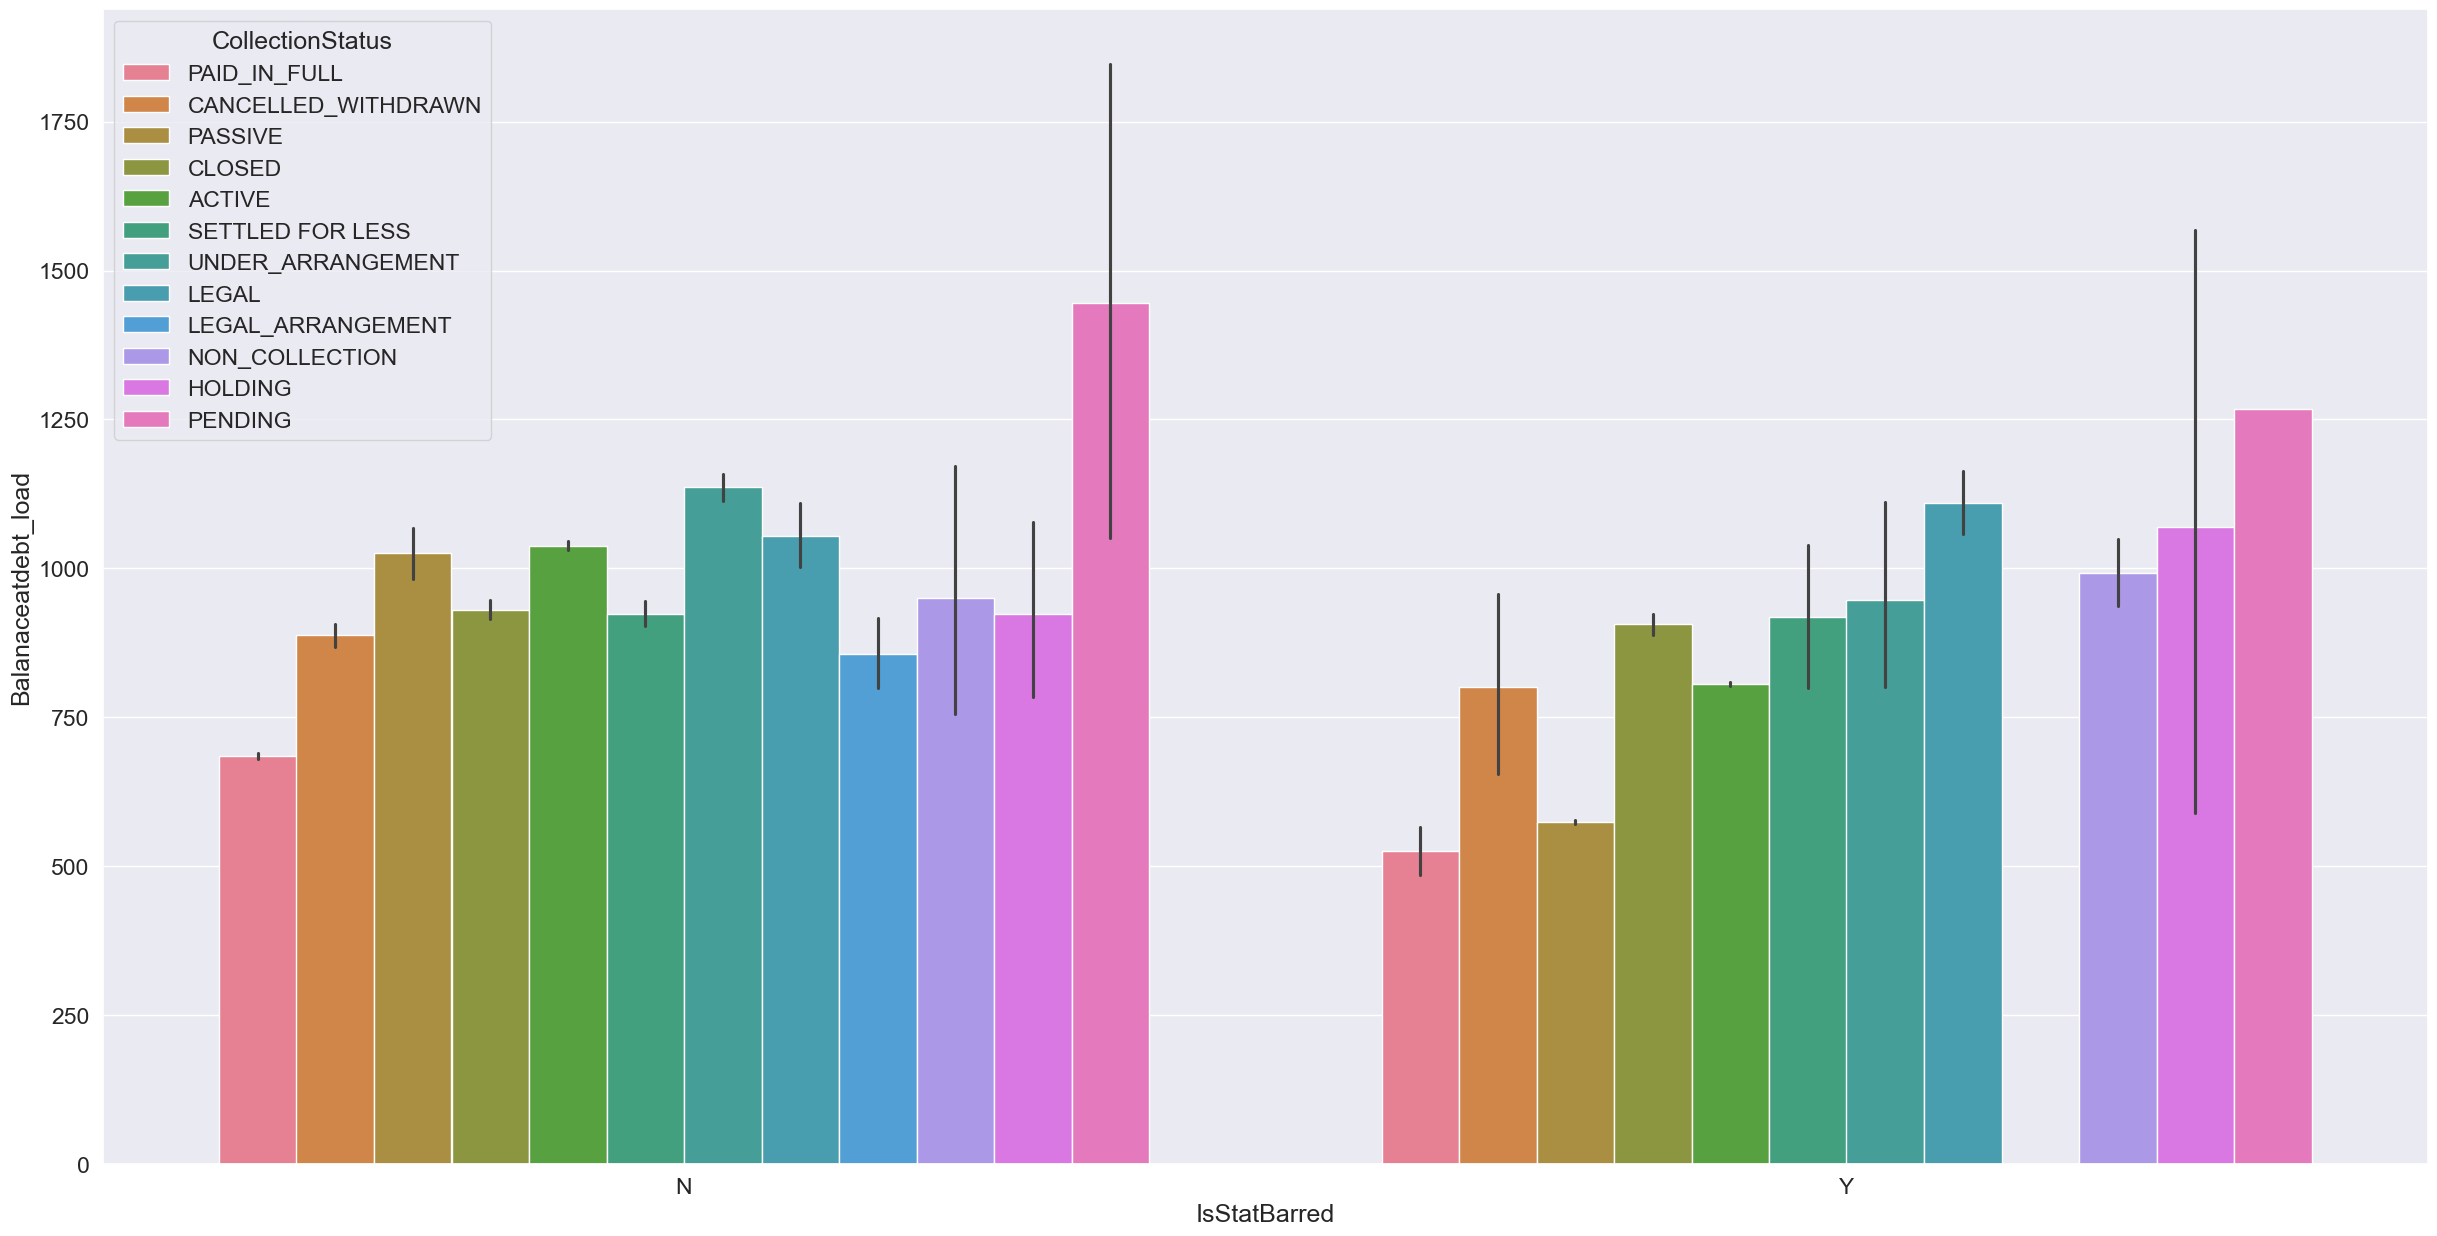

In [26]:
plt.figure(figsize=(30,15))
sns.barplot(data=df, x=df['IsStatBarred'], y=df['Balanaceatdebt_load'], hue=df['CollectionStatus'])

<Axes: xlabel='IsStatBarred', ylabel='PurchasePrice'>

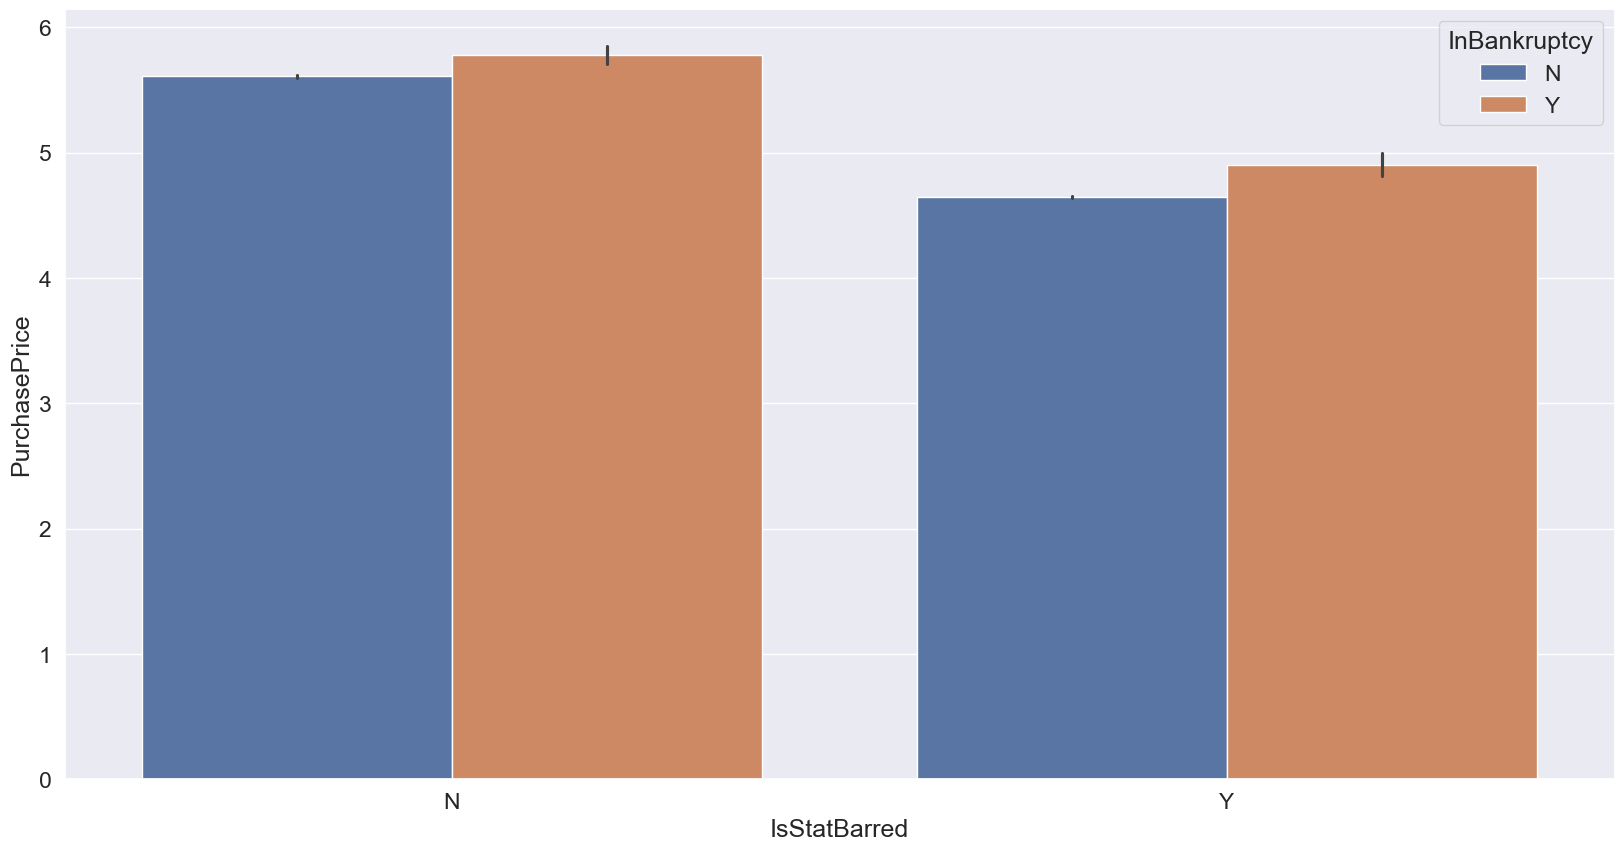

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x=df['IsStatBarred'], y=df['PurchasePrice'], hue=df['InBankruptcy'])

<Axes: xlabel='IsStatBarred', ylabel='CustomerAge'>

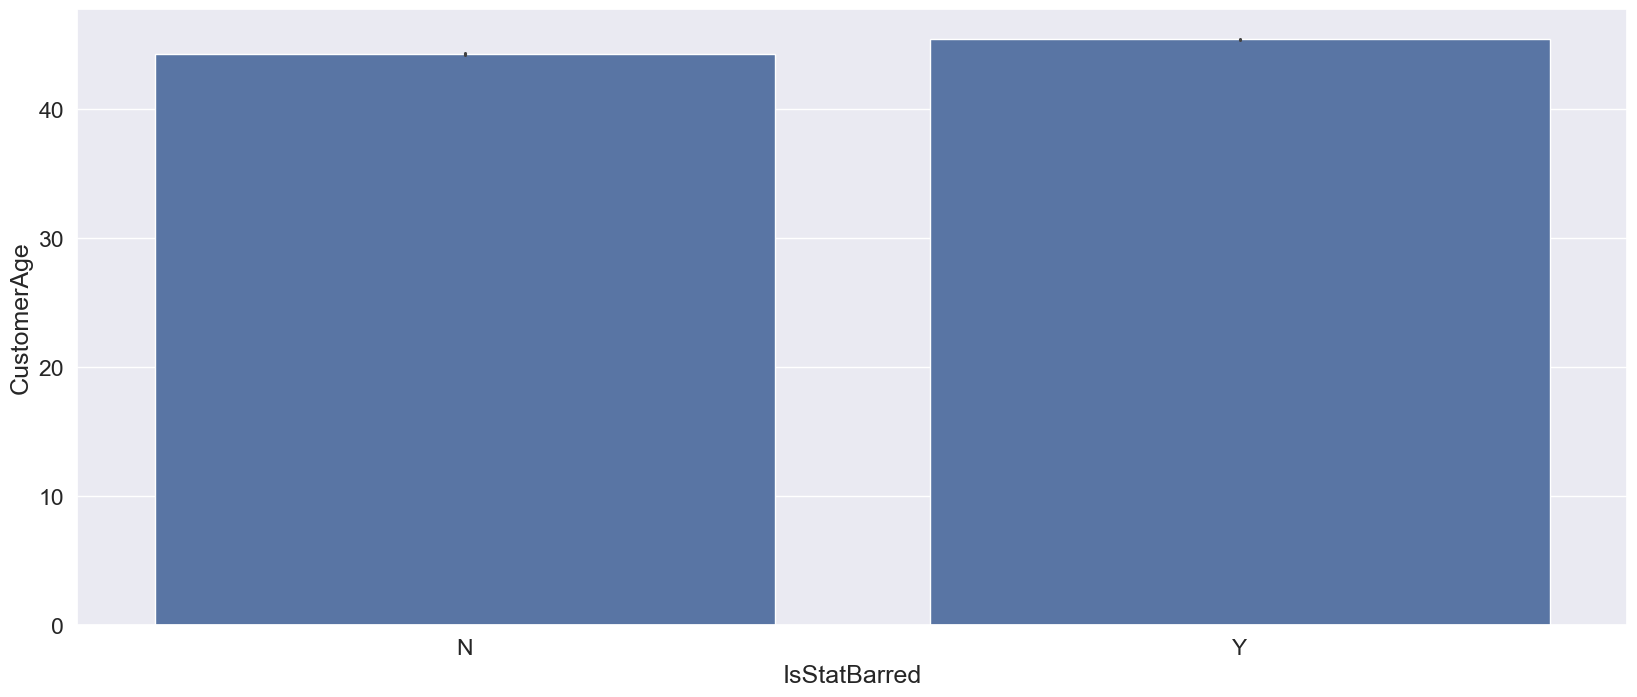

In [28]:
plt.figure(figsize=(20,8))
sns.barplot(data=df, x=df['IsStatBarred'], y=df['CustomerAge'])

<Axes: xlabel='IsStatBarred', ylabel='DebtLoadPrincipal'>

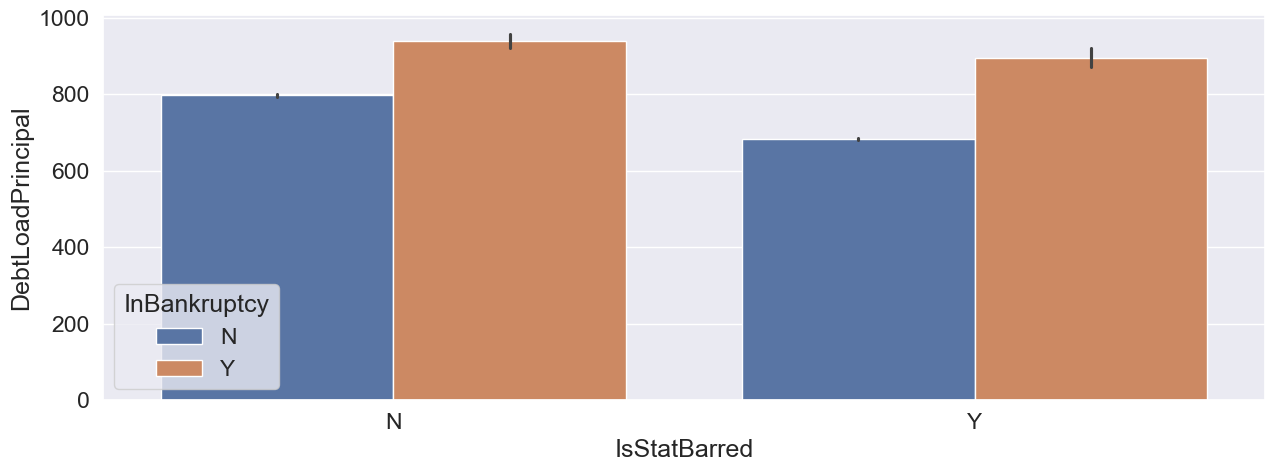

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x=df['IsStatBarred'], y=df['DebtLoadPrincipal'], hue=df['InBankruptcy'])

<Axes: >

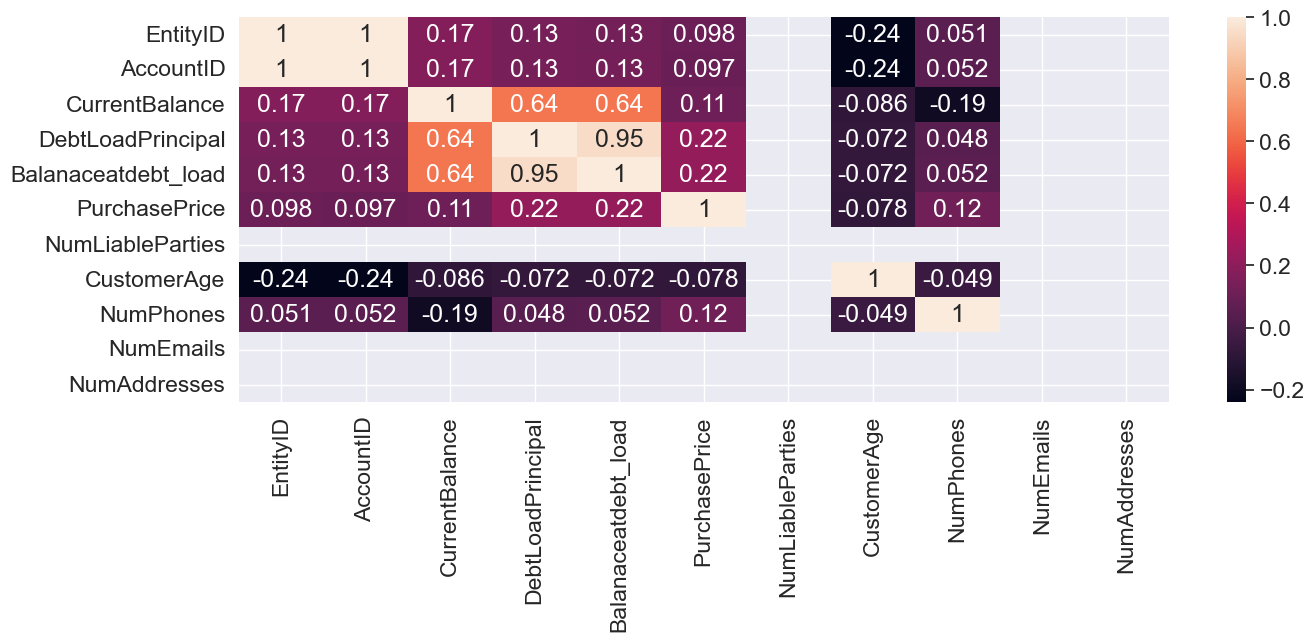

In [30]:
# Checking the Correlation
correlation = df.corr(numeric_only=True)

# Generating HeatMap
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Feature Engineering

In [31]:
x = df.drop(columns='IsStatBarred')
y = df['IsStatBarred']

In [32]:
x

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,932,Creditor 1,3677,0.000000,1160.200000,1160.200000,4.22,Other,PAID_IN_FULL,N,Y,1.0,53.000000,0.0,0.0,1.0
1,160,Creditor 2,4276,182.900000,182.900000,182.900000,4.22,Other,CANCELLED_WITHDRAWN,N,N,1.0,45.728061,0.0,0.0,1.0
2,932,Creditor 1,8525,0.000000,538.570000,538.570000,4.22,Other,PAID_IN_FULL,N,N,1.0,45.728061,1.0,0.0,1.0
3,160,Creditor 2,9859,484.979729,649.670386,663.369694,4.22,Other,PASSIVE,N,N,1.0,45.728061,1.0,0.0,1.0
4,932,Creditor 1,12807,0.000000,523.000000,523.000000,4.22,Other,PAID_IN_FULL,N,Y,1.0,46.000000,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406418,99901565,Creditor 50,990495842,448.200000,448.200000,448.200000,7.38,Finance Company - Other,ACTIVE,N,N,1.0,36.000000,1.0,0.0,1.0
406419,99901565,Creditor 50,990495843,1678.370000,1678.370000,1678.370000,7.38,Finance Company - Other,ACTIVE,N,N,1.0,37.000000,0.0,0.0,1.0
406420,99901565,Creditor 50,990495844,484.979729,649.670386,663.369694,7.38,Finance Company - Other,ACTIVE,N,N,1.0,71.000000,1.0,0.0,1.0
406421,99901565,Creditor 50,990495845,484.979729,649.670386,663.369694,7.38,Finance Company - Other,ACTIVE,N,N,1.0,38.000000,1.0,0.0,1.0


In [33]:
y

0         N
1         Y
2         N
3         Y
4         Y
         ..
406418    N
406419    N
406420    N
406421    N
406422    N
Name: IsStatBarred, Length: 406423, dtype: object

In [34]:
scaler = StandardScaler()

In [35]:
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])
x

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,-0.845103,Creditor 1,-0.849526,-0.940598,0.683501,0.644957,-0.292599,Other,PAID_IN_FULL,N,Y,0.0,0.700004,-0.619347,0.0,0.0
1,-0.845120,Creditor 2,-0.849525,-0.632220,-0.837342,-0.838760,-0.292599,Other,CANCELLED_WITHDRAWN,N,N,0.0,0.058643,-0.619347,0.0,0.0
2,-0.845103,Creditor 1,-0.849516,-0.940598,-0.283860,-0.298789,-0.292599,Other,PAID_IN_FULL,N,N,0.0,0.058643,0.996819,0.0,0.0
3,-0.845120,Creditor 2,-0.849513,-0.122900,-0.110969,-0.109321,-0.292599,Other,PASSIVE,N,N,0.0,0.058643,0.996819,0.0,0.0
4,-0.845103,Creditor 1,-0.849507,-0.940598,-0.308090,-0.322427,-0.292599,Other,PAID_IN_FULL,N,Y,0.0,0.082627,2.612986,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406418,1.281318,Creditor 50,1.278385,-0.184912,-0.424491,-0.435987,0.995213,Finance Company - Other,ACTIVE,N,N,0.0,-0.799340,0.996819,0.0,0.0
406419,1.281318,Creditor 50,1.278385,1.889212,1.489860,1.431632,0.995213,Finance Company - Other,ACTIVE,N,N,0.0,-0.711143,-0.619347,0.0,0.0
406420,1.281318,Creditor 50,1.278385,-0.122900,-0.110969,-0.109321,0.995213,Finance Company - Other,ACTIVE,N,N,0.0,2.287545,0.996819,0.0,0.0
406421,1.281318,Creditor 50,1.278385,-0.122900,-0.110969,-0.109321,0.995213,Finance Company - Other,ACTIVE,N,N,0.0,-0.622947,0.996819,0.0,0.0


In [36]:
# Applying Label Encoding on the target columns
le = LabelEncoder()

In [37]:
y = le.fit_transform(y)
y

array([0, 1, 0, ..., 0, 0, 0])

In [38]:
# Now Applying One-Hot Encoding on the input columns
x = pd.get_dummies(x, drop_first = True)
x

,EntityID,AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,NumLiableParties,CustomerAge,NumPhones,NumEmails,...,CollectionStatus_LEGAL,CollectionStatus_LEGAL_ARRANGEMENT,CollectionStatus_NON_COLLECTION,CollectionStatus_PAID_IN_FULL,CollectionStatus_PASSIVE,CollectionStatus_PENDING,CollectionStatus_SETTLED FOR LESS,CollectionStatus_UNDER_ARRANGEMENT,InBankruptcy_Y,IsLegal_Y
0,-0.845103,-0.849526,-0.940598,0.683501,0.644957,-0.292599,0.0,0.700004,-0.619347,0.0,...,False,False,False,True,False,False,False,False,False,True
1,-0.845120,-0.849525,-0.632220,-0.837342,-0.838760,-0.292599,0.0,0.058643,-0.619347,0.0,...,False,False,False,False,False,False,False,False,False,False
2,-0.845103,-0.849516,-0.940598,-0.283860,-0.298789,-0.292599,0.0,0.058643,0.996819,0.0,...,False,False,False,True,False,False,False,False,False,False
3,-0.845120,-0.849513,-0.122900,-0.110969,-0.109321,-0.292599,0.0,0.058643,0.996819,0.0,...,False,False,False,False,True,False,False,False,False,False
4,-0.845103,-0.849507,-0.940598,-0.308090,-0.322427,-0.292599,0.0,0.082627,2.612986,0.0,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406418,1.281318,1.278385,-0.184912,-0.424491,-0.435987,0.995213,0.0,-0.799340,0.996819,0.0,...,False,False,False,False,False,False,False,False,False,False
406419,1.281318,1.278385,1.889212,1.489860,1.431632,0.995213,0.0,-0.711143,-0.619347,0.0,...,False,False,False,False,False,False,False,False,False,False
406420,1.281318,1.278385,-0.122900,-0.110969,-0.109321,0.995213,0.0,2.287545,0.996819,0.0,...,False,False,False,False,False,False,False,False,False,False
406421,1.281318,1.278385,-0.122900,-0.110969,-0.109321,0.995213,0.0,-0.622947,0.996819,0.0,...,False,False,False,False,False,False,False,False,False,False


## Data Modelling and Evaluation

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101, stratify=y)

In [42]:
logreg = LogisticRegression()

In [43]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [44]:
# For Training Data
y_train_pred_logreg = logreg.predict(x_train)

In [46]:
print(classification_report(y_train, y_train_pred_logreg))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     97500
           1       0.96      0.98      0.97    227638

    accuracy                           0.96    325138
   macro avg       0.96      0.95      0.96    325138
weighted avg       0.96      0.96      0.96    325138



In [47]:
# For Test Data
y_test_pred_logreg = logreg.predict(x_test)

In [48]:
print(classification_report(y_test, y_test_pred_logreg))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     24375
           1       0.96      0.98      0.97     56910

    accuracy                           0.96     81285
   macro avg       0.96      0.95      0.96     81285
weighted avg       0.96      0.96      0.96     81285



In [49]:
# Accuracy Score for Logistic Regression
accuracy_score(y_test, y_test_pred_logreg)

0.9642738512640708

In [51]:
# K-Nearest Neighbours Classification
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [52]:
# Checking the Accuracy of the training data using KNN 
y_train_pred_knn=knn.predict(x_train)
accuracy_score(y_train, y_train_pred_knn)

0.9721379844865873

In [54]:
# Checking the Accuracy of the test data using KNN 
y_test_pred_knn=knn.predict(x_test)
accuracy_score(y_test, y_test_pred_knn)

0.9646552254413483

In [55]:
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     24375
           1       0.97      0.98      0.98     56910

    accuracy                           0.96     81285
   macro avg       0.96      0.95      0.96     81285
weighted avg       0.96      0.96      0.96     81285



In [56]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize the classifiers
dtc = DecisionTreeClassifier(random_state=101)
rfc = RandomForestClassifier(random_state=101)

grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

grid_search_dtc.fit(x_train, y_train)
grid_search_rfc.fit(x_train, y_train)

# Get the best estimator from the grid search
best_dtc = grid_search_dtc.best_estimator_ 
best_rfc = grid_search_rfc.best_estimator_

y_pred_dtc = best_dtc.predict(x_test)
y_pred_rfc = best_rfc.predict(x_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [57]:
# Accuracy Score for Decision Tree Classifier
accuracy_score(y_test, y_pred_dtc)

0.971766008488651

In [58]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     24375
           1       0.97      0.99      0.98     56910

    accuracy                           0.97     81285
   macro avg       0.97      0.96      0.97     81285
weighted avg       0.97      0.97      0.97     81285



In [59]:
# Accuracy Score for Random Forest Classifier
accuracy_score(y_test, y_pred_rfc)

0.9750630497631789

In [60]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     24375
           1       0.97      0.99      0.98     56910

    accuracy                           0.98     81285
   macro avg       0.98      0.97      0.97     81285
weighted avg       0.98      0.98      0.97     81285



In [61]:
# Creating a Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfc)
cm

array([[22928,  1447],
       [  580, 56330]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

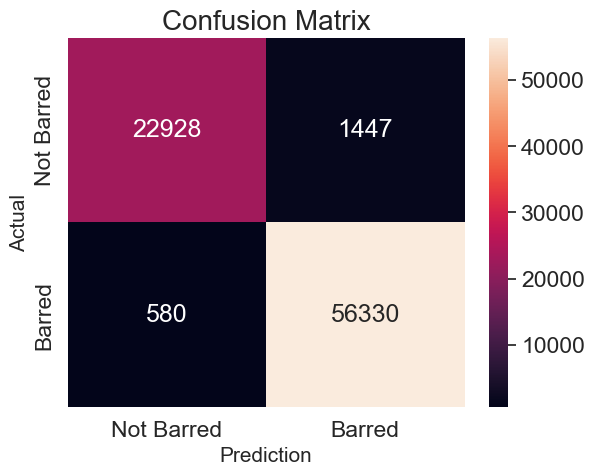

In [64]:
sns.heatmap(cm, fmt='g', xticklabels = ['Not Barred', 'Barred'], yticklabels = ['Not Barred', 'Barred'], annot = True)
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Prediction', fontsize=15)
plt.title('Confusion Matrix', fontsize = 20)